# Experiment 5 Classifying movie reviews - a binary classification example

## Task

Understand the IMDB database and construct a binary classification network.
<ol> 
    <li> Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
    <li> Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
    <li> Try using the mse loss function instead of binary_crossentropy.
    <li> Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.
</ol>

# 1 The IMDB dataset

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


# 2 Encoding the sequences into a binary matrix

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_data.shape

(25000,)

In [6]:
x_train.shape

(25000, 10000)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
y_train.shape

(25000,)

In [9]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# 3 Building a binary classification network

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 4 Training

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 41s 3ms/step - loss: 0.5390 - acc: 0.7745 - val_loss: 0.4000 - val_acc: 0.8687
Epoch 2/15
15000/15000 [==============================] - 7s 450us/step - loss: 0.3210 - acc: 0.8990 - val_loss: 0.3288 - val_acc: 0.8711
Epoch 3/15
15000/15000 [==============================] - 3s 233us/step - loss: 0.2358 - acc: 0.9241 - val_loss: 0.2872 - val_acc: 0.8866
Epoch 4/15
15000/15000 [==============================] - 3s 194us/step - loss: 0.1853 - acc: 0.9391 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/15
15000/15000 [==============================] - 4s 258us/step - loss: 0.1533 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8809
Epoch 6/15
15000/15000 [==============================] - 3s 171us/step - loss: 0.1236 - acc: 0.9625 - val_loss: 0.2877 - val_acc: 0.8866
Epoch 7/15
15000/15000 [==============================] - 3s 200us/step - l

# 5 Plot accuracy

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
history_dict['acc']

[0.7744666667620341,
 0.898999999777476,
 0.9241333331108094,
 0.939066666952769,
 0.9509333335558573,
 0.9624666664759318,
 0.9655333333015442,
 0.974799999777476,
 0.982133333492279,
 0.9850666664759318,
 0.9902666664759318,
 0.9928666669209798,
 0.9948666666666667,
 0.9946,
 0.9969999998092651]

In [19]:
history_dict['val_acc']

[0.8686999996185303,
 0.8711000001907349,
 0.8866000001907348,
 0.8905000001907348,
 0.8809000000953674,
 0.8866000000953674,
 0.8838,
 0.8819,
 0.8802000001907349,
 0.8780000000953674,
 0.8729999999046326,
 0.8766999997138977,
 0.8755000001907348,
 0.8726999999046325,
 0.8614999992370606]

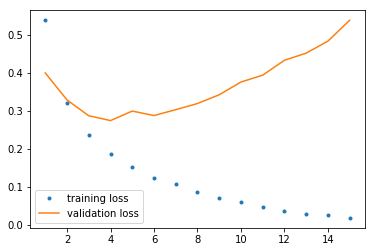

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = np.arange(1,len(loss_values)+1)
plt.plot(epoch, loss_values, '.', label='training loss')
plt.plot(epoch, val_loss_values, '-', label='validation loss')
plt.legend(loc='best')

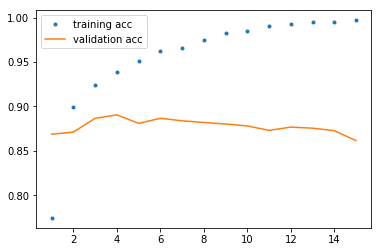

In [22]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epoch, acc_values, '.', label='training acc')
plt.plot(epoch, val_acc_values, '-', label='validation acc')
plt.legend(loc='best')

In [23]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 109s 4ms/step


In [24]:
results

[0.6022022567296028, 0.84468]

# 6 Generate predictions on new data

In [25]:
pre = model.predict(x_test)

In [26]:
pre

array([[0.0181945 ],
       [0.99999994],
       [0.76731354],
       ...,
       [0.00963637],
       [0.01453593],
       [0.48772493]], dtype=float32)

In [27]:
persentage = pre*100

In [28]:
persentage.astype(int)

array([[ 1],
       [99],
       [76],
       ...,
       [ 0],
       [ 1],
       [48]])

<BarContainer object of 10 artists>

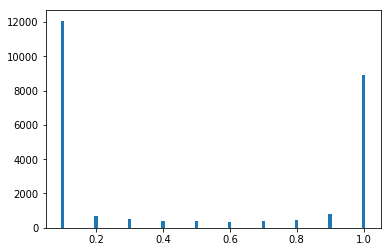

In [29]:
hist, bin_edges = np.histogram(pre)
plt.bar(bin_edges[1:], hist, width=.01)

(array([12069.,   686.,   503.,   419.,   388.,   338.,   390.,   481.,
          804.,  8922.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

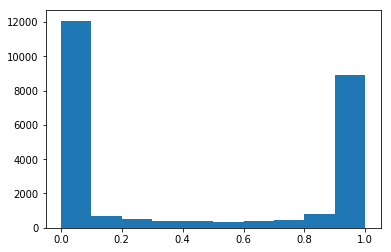

In [30]:
plt.hist(pre)

# 7 Analysis and Conclusion

From the plot accuracy, we can see that the model work well with training data while the performance in validation data is getting worst. The global minimum of validation loss is at 4th epochs, this shoould be the best epochs of this model. We can conclude that this model suffer an overfitting problem. Therefore, the solution algorithm for overfitting is advisable such as dropout.   